# Representación del modelo

<figure>
 <img src="https://github.com/emipaz/Clase-Machine-Learning/blob/1675b58e5f024bf9375a8d62b80cbef71b622218/Clase%206/images/C1_W1_L3_S2_Lecture_b.png?raw=true"   style="width:600px;height:200px;">
</figure>


## Objetivo

Objetivos
En este laboratorio podrás:
- Aprender a implementar el modelo $f_{w,b}$ para la regresión lineal con una variable

## Notación
A continuación, un resumen de algunas de las notaciones que encontrará. 

| General       Notation  | Description Python (if applicable)         |  Python (if applicable) |
| ------------------------| ------------------------------------------ | ----------------------- |
| $a$                     | scalar, normal                             | |
| $\mathbf{a}$            | vector, negrita                            | |
| **Regression**          |                                            | |
|  $\mathbf{x}$ | Ejemplo de entrenamiento  ( aca tamaños (1000 pies^2))  | `x_train` |  
|  $\mathbf{y}$  | Ejemplo de Objetivos  (aca precios (1000s de dolares)).  | `y_train` |
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Exemplo  | `x_i`, `y_i`|
| m | Numeros de exemplos  ed entrenamiento | `m`|
|  $w$  |  parametro: weight, (pesos)                                 | `w`    |
|  $b$           |  parametro: bias  (sesgo)                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | El resultado de la evaluación del modelo en $x^{(i)}$ parametrizado con $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 

## Herramientas
En este laboratorio harás uso de 
- NumPy, una biblioteca popular para la computación científica
- Matplotlib, una biblioteca popular para trazar datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Planteamiento del problema
<img align="left" src="https://github.com/emipaz/Clase-Machine-Learning/blob/1675b58e5f024bf9375a8d62b80cbef71b622218/Clase%206/images/C1_W1_L3_S1_trainingdata.png?raw=true"    style=" width:380px; padding: 10px;  " /> 

Este laboratorio utilizará un conjunto de datos sencillo con sólo dos puntos de datos: una casa de 1.000 pies cuadrados vendida por 300.000 dólares y una casa de 2.000 pies cuadrados vendida por 500.000 dólares. Estos dos puntos constituirán nuestro *conjunto de datos o de entrenamiento*. En este laboratorio, las unidades de tamaño son 1000 pies cuadrados y las unidades de precio son 1000 dólares.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

Le gustaría ajustar un modelo de regresión lineal (que se muestra arriba como la línea recta azul) a través de estos dos puntos, de modo que pueda predecir el precio de otras casas, por ejemplo, una casa de 1200 pies cuadrados.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [34]:
# x_train es la variable de entrada (tamaño en 1000 pies cuadrados)
# y_train es el objetivo (precio en 1000s de dólares)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Nota**: El curso utilizará frecuentemente el formato de salida 'f-string' de python descrito [aquí](https://docs.python.org/3/tutorial/inputoutput.html) al imprimir. El contenido entre las llaves se evalúa al producir la salida.

### Número de ejemplos de entrenamiento `m`

Se utilizará `m` para denotar el número de ejemplos de entrenamiento. Los arrays Numpy tienen un parámetro `.shape`. El parámetro `x_train.shape` devuelve una tupla python con una entrada para cada dimensión. `x_train.shape[0]` es la longitud del array y el número de ejemplos como se muestra a continuación.

In [35]:
# m el numero de ejemplos de entrenamiento 
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Numero de ejemplos de entrenamiento: {m}")

x_train.shape: (2,)
Numero de ejemplos de entrenamiento: 2


También se puede utilizar la función `len()` de Python como se muestra a continuación.

In [37]:
m = len(x_train)
print(f"Numero de ejemplos de entrenamiento: {m}")

Numero de ejemplos de entrenamiento: 2


### Ejemplos de entrenamiento `x_i, y_i`

Se utilizará ($x^{(i)}$ , $y^{(i)}$) para denotar el $i^{th}$ ejemplo de entrenamiento. Dado que Python tiene índice cero, ($x^{(0)}$, $y^{(0)}$) es (1,0, 300,0) y ($x^{(1)}$, $y^{(1)}$) es (2,0, 500,0). 

Para acceder a un valor en una matriz Numpy, uno indexa la matriz con el desplazamiento deseado. Por ejemplo, la sintaxis para acceder a la ubicación cero de `x_train` es `x_train[0]`.
Ejecute el siguiente bloque de código para obtener el ejemplo de entrenamiento $i^{th}$.

In [38]:
i = 0 

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Graficando los datos

Puede trazar estos dos puntos utilizando la función `scatter()` de la biblioteca `matplotlib`, como se muestra en la celda de abajo. 
- Los argumentos de la función `marker` y `c` muestran los puntos como cruces rojas (por defecto son puntos azules).

Puede utilizar otras funciones de la biblioteca `matplotlib` para establecer el título y las etiquetas que se mostrarán

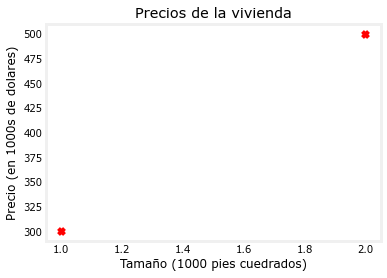

In [39]:
# grefica los puntos
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Precios de la vivienda")
# Set the y-axis label
plt.ylabel('Precio (en 1000s de dolares)')
# Set the x-axis label
plt.xlabel('Tamaño (1000 pies cuedrados)')
plt.show()

## Función del modelo

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > Como se describe en la lectura, el modelo de regresión linear es representada con las siguiente funcion.

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La fórmula anterior es la forma en que se pueden representar las líneas rectas - diferentes valores de $w$ y $b$ dan diferentes líneas rectas en el gráfico. <br/> <br/> <br/> <br/> <br/> 

Intentemos intuirlo mejor a través de los bloques de código siguientes. Empecemos con $w = 100$ y $b = 100$. 

**Nota: Puedes volver a esta celda para ajustar los parámetros w y b del modelo**

In [47]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Ahora, vamos a calcular el valor de $f_{w,b}(x^{(i)})$ para sus dos puntos de datos. Usted puede escribir explícitamente esto para cada punto de datos como 

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para un gran número de puntos de datos, esto puede ser difícil de manejar y repetitivo. Así que en su lugar, puede calcular la salida de la función en un bucle `for` como se muestra en la función `compute_model_output` a continuación.
> **Nota**: La descripción del argumento `(ndarray (m,))` describe un array n-dimensional de Numpy de forma (m,). El argumento `(scalar)` describe un argumento sin dimensiones, sólo una magnitud.  
> **Nota**: `np.zero(n)` devolverá un array numpy unidimensional con $n$ entradas   


In [48]:
def compute_model_output(x, w, b):
    """
    Calcula el precios de la vivienda la predicción de un modelo lineal
    Args:
      x (ndarray (m,)): Datos, m ejemplos 
      w,b (escalar) : parámetros del modelo  
    Devuelve
      y (ndarray (m,)): valores objetivo
    """
    m    = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Ahora vamos a llamar a la función `compute_model_output` y a trazar la salida.

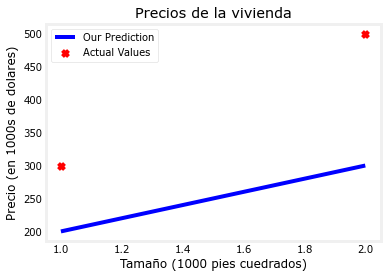

In [49]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Precios de la vivienda")
plt.ylabel('Precio (en 1000s de dolares)')
plt.xlabel('Tamaño (1000 pies cuedrados)')
plt.legend()
plt.show()

Como puedes ver, al establecer $w = 100$ y $b = 100$ no se obtiene una línea que se ajuste a nuestros datos. 

### Desafío
Prueba a experimentar con diferentes valores de $w$ y $b$. ¿Cuáles deberían ser los valores para obtener una recta que se ajuste a nuestros datos?

#### Consejo:
Puedes usar tu ratón para hacer clic en el triángulo a la izquierda de las "Pistas" verdes de abajo para revelar algunas pistas para elegir b y w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Predicción
Ahora que tenemos un modelo, podemos utilizarlo para hacer nuestra predicción original. Vamos a predecir el precio de una casa de 1200 pies cuadrados. Como las unidades de $x$ están en 1000 pies cuadrados, $x$ es 1,2.


In [46]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} mil dólares")

$340 mil dólares


# Multiple Variable Linear Regression (Regresión lineal de múltiples variables)

En este laboratorio, usted ampliará las estructuras de datos y las rutinas previamente desarrolladas para soportar múltiples características. Varias rutinas se actualizan haciendo que el laboratorio parezca largo, pero hace pequeños ajustes a las rutinas anteriores haciendo que sea rápido de revisar.

In [66]:
import copy, math
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## 1.3 Notacion
A continuación se presenta un resumen de algunas de las anotaciones que encontrará, actualizadas para múltiples funciones.  

|General | Description| Python (if applicable) |
|:--------------|:------------------|:----------------------:|
| $a$           | Escalar, normal  ||
| $\mathbf{A}$  | Matriz, Mayuscula negrita                              ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | Matriz ejemplos de entrenamiento   | `X_train` |   
|  $\mathbf{y}$  | Vector con valores exactos        | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ Enecimo ejemplo| `X[i]`, `y[i]`|
| m | Numero de ejemplos | `m`|
| n | Número de características en cada ejemplo | `n`|
|  $\mathbf{w}$  |  Parametro: weight (pesos),                       | `w`    |
|  $b$           |  Parametro : bias (sesgo)                         | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | El resultado de la evaluación del modelo en $\mathbf{x^{(i)}}$ parametrizado por $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 

## 2 Planteamiento del problema

Se utilizará el ejemplo motivador de la predicción del precio de la vivienda. El conjunto de datos de entrenamiento contiene tres ejemplos con cuatro características (tamaño, dormitorios, pisos y, edad) que se muestran en la tabla siguiente.  Tenga en cuenta que, a diferencia de los laboratorios anteriores, el tamaño está expresado en pies cuadrados en lugar de 1000 pies cuadrados. Esto causa un problema, que se resolverá en el próximo laboratorio.

| Tamaño (pies cuadrados)| número de dormitorios| número de plantas| edad de la vivienda| precio (miles de dólares).|
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |

Construirás un modelo de regresión lineal utilizando estos valores para poder predecir el precio de otras casas. Por ejemplo, una casa de 1200 pies cuadrados, 3 dormitorios, 1 piso, 40 años de antigüedad.  

Por favor, ejecute la siguiente celda de código para crear sus variables `X_train` y `y_train`.

In [67]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# 2.1 Matriz X que contiene nuestros ejemplos
Al igual que la tabla anterior, los ejemplos se almacenan en una matriz NumPy `X_train`. Cada fila de la matriz representa un ejemplo. Cuando usted tiene $m$ ejemplos de entrenamiento ( $m$ es tres en nuestro ejemplo), y hay $n$ características (cuatro en nuestro ejemplo), $\mathbf{X}$ es una matriz con dimensiones ($m$, $n$) (m filas, n columnas).

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

Notación:
- $\mathbf{x}^{(i)}$ es el vector que contiene el ejemplo i.  $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ es el elemento j en el ejemplo i. El superíndice entre paréntesis indica el número del ejemplo mientras que el subíndice representa un elemento.  

In [68]:
# los datos se almacenan en un array/matriz numpy
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## 2.2 Vector de parámetros w, b

* $\mathbf{w}$ es un vector con $n$ elementos.
  - Cada elemento contiene el parámetro asociado a una característica.
  - En nuestro conjunto de datos, n es 4.
  - nocionalmente, lo dibujamos como un vector de columnas

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ es un escalar. 

In [69]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# 3 Predicción del modelo con múltiples variables
La predicción del modelo con múltiples variables viene dada por el modelo lineal:


$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
donde $\cdot$ es el producto vectorial `dot product` 

Para demostrar el producto punto, implementaremos la predicción utilizando (1) y (2).

In [70]:
def predict_single_loop(x, w, b): 
    """
    predicción simple mediante regresión lineal
    
    Args:
      x (ndarray): Ejemplo de forma (n,) con múltiples características
      w (ndarray): Parámetros del modelo Shape (n,)    
      b (escalar): parámetro del modelo     
      
    Devuelve:
      p (escalar): predicción
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [71]:
# obtener una fila de nuestros datos de entrenamiento
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec valor: {x_vec}")

# hacer una predicción
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predicción: {f_wb}")

x_vec shape (4,), x_vec valor: [2104    5    1   45]
f_wb shape (), predicción: 459.9999976194083


## 3.2 Predicción única, vectorizada

Observando que la ecuación (1) anterior puede implementarse utilizando el producto punto como en (2) anterior. Podemos hacer uso de las operaciones vectoriales para acelerar las predicciones.

Recordemos del laboratorio de Python/Numpy que NumPy `np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)] puede utilizarse para realizar un producto punto vectorial.

In [72]:
def predict(x, w, b): 
    """
    Predicción simple mediante regresión lineal
    Args:
      x (ndarray): Ejemplo de forma (n,) con múltiples características
      w (ndarray): Parámetros del modelo Shape (n,)   
      b (escalar): parámetro del modelo 
      
    Devuelve:
      p (escalar): predicción
    """
    p = np.dot(x, w) + b     
    return p  

In [73]:
# obtener una fila de nuestros datos de entrenamiento
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec valor: {x_vec}")

# hacer una predicción
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predicción: {f_wb}")

x_vec shape (4,), x_vec valor: [2104    5    1   45]
f_wb shape (), predicción: 459.9999976194083


Los resultados y las formas son los mismos que en la versión anterior, que utilizaba el bucle. En adelante, se utilizará `np.dot` para estas operaciones. La predicción es ahora una única sentencia. La mayoría de las rutinas la implementarán directamente en lugar de llamar a una rutina de predicción separada.


# 4 Calcular el coste con múltiples variables

La ecuación para la función de coste con múltiples variables $J(\mathbf{w},b)$ es:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

A diferencia de los laboratorios anteriores, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ son vectores en lugar de escalares que soportan múltiples características.

A continuación se muestra una implementación de las ecuaciones (3) y (4). Tenga en cuenta que esto utiliza un *patrón estándar para este curso* donde se utiliza un bucle for sobre todos los ejemplos `m`.

In [74]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [76]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Coste en el punto óptimo w : {cost}')

Coste en el punto óptimo w : 1.5578904880036537e-12


$$\begin{align*} \text{repite}&\text{ hasta la convergencia:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde , n es el número de características, los parámetros $w_j$, $b$, se actualizan simultáneamente y donde 

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

* m es el número de ejemplos de entrenamiento en el conjunto de datos

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$  es la predicción del modelo, mientras que $y^{(i)}$ es el valor objetivo

## 5.1 Calcular el gradiente con múltiples variables
A continuación se presenta una implementación para calcular las ecuaciones (6) y (7). Hay muchas maneras de implementar esto. En esta versión, hay un
- bucle externo sobre todos los m ejemplos. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo puede ser calculado directamente y acumulado
    - en un segundo bucle sobre todas las n características:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ se calcula para cada $w_j$.

In [28]:
def compute_gradient(X, y, w, b):
    """
    Calcula el gradiente para la regresión lineal 
    Args:
      X (ndarray (m,n)): Datos, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros del modelo  
      b (escalar) : parámetro del modelo
      
    Devuelve:
      dj_dw (ndarray (n,)): El gradiente del coste con respecto a los parámetros w. 
      dj_db (escalar):       El gradiente del coste con respecto al parámetro b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot( X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [77]:
# Calcular y mostrar el gradiente 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db al inicio w,b: {tmp_dj_db}')
print(f'dj_dw al inicio w,b: \n {tmp_dj_dw}')

dj_db al inicio w,b: -1.673925169143331e-06
dj_dw al inicio w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


## 5.2 Descenso de gradiente con múltiples variables
La siguiente rutina implementa la ecuación (5) anterior.

In [80]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Realiza el descenso de gradiente por lotes para aprender theta. Actualiza theta tomando 
    num_iters pasos de gradiente con tasa de aprendizaje alpha
    
    Args:
      X (ndarray (m,n))   : Datos, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : parámetros iniciales del modelo  
      b_in (escalar)      : parámetro inicial del modelo
      función_de_coste    : función para calcular el coste
      gradient_function   : función para calcular el gradiente
      alpha (float)       : Tasa de aprendizaje
      num_iters (int)     : número de iteraciones para ejecutar el descenso de gradiente
      
    Devuelve:
      w (ndarray (n,))    : Valores actualizados de los parámetros 
      b (escalar)         : Valor actualizado del parámetro 
      """
    
    # Una matriz para almacenar los costes J y w en cada iteración, principalmente para graficarlos posteriormente
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function  ??
    b = b_in
    
    for i in range(num_iters):

        # Calcular el gradiente y actualizar los parámetros
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Actualizar los parámetros mediante w, b, alfa y gradiente
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Guardar el coste J en cada iteración
        if i < 100000:      # evitar el agotamiento de los recursos 
            J_history.append( cost_function(X, y, w, b))

        # Imprimir el coste cada a intervalos de 10 veces o tantas iteraciones si < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteracion {i:4d}: Costo {J_history[-1]:8.2f}   ")
        
    return w, b, J_history # devuelve el historial final de w,b y J para su graficación

In [81]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w encontrado por el descenso de gradiente: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"predicción: {np.dot(X_train[i], w_final) + b_final:0.2f}, valor objetivo: {y_train[i]}")

Iteracion    0: Costo  2529.46   
Iteracion  100: Costo   695.99   
Iteracion  200: Costo   694.92   
Iteracion  300: Costo   693.86   
Iteracion  400: Costo   692.81   
Iteracion  500: Costo   691.77   
Iteracion  600: Costo   690.73   
Iteracion  700: Costo   689.71   
Iteracion  800: Costo   688.70   
Iteracion  900: Costo   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


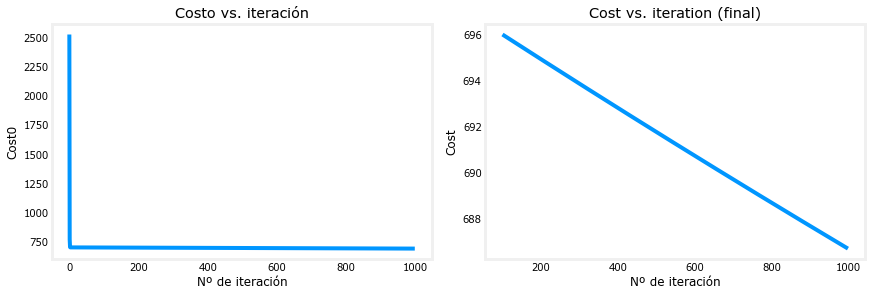

In [83]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Costo vs. iteración");  ax2.set_title("Cost vs. iteration (final)")
ax1.set_ylabel('Cost0')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('Nº de iteración')   ;  ax2.set_xlabel('Nº de iteración') 
plt.show()